<a href="https://colab.research.google.com/github/aleksho/hack_nn_cp_202106/blob/main/arxiv_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arxivabscraper
!pip install arxivscraper
!pip install arxiv

     |████████████████████████████████| 81kB 3.5MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp37-none-any.whl size=6067 sha256=8f2cee4ddffaab88a3534e7d06770059a0d9238e96f870e98ece7645d03e35b3
  Stored in directory: /root/.cache/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370adb944506a
Successfully built sgmllib3k


In [ ]:
import arxivscraper
import arxivabscraper
import pandas as pd
import arxiv

In [ ]:
scraper = arxivscraper.Scraper(category='physics:cond-mat', date_from='2017-05-27',date_until='2017-06-07')

In [ ]:
output = scraper.scrape()
cols = ('id', 'title', 'categories', 'abstract', 'doi', 'created', 'updated', 'authors')
df = pd.DataFrame(output, columns=cols)

fetching up to  1000 records...
fetching is completed in 6.2 seconds.
Total number of records 547


In [ ]:
df['created'] = pd.to_datetime(df['created'])

In [ ]:
df

,id,title,categories,abstract,doi,created,updated,authors
0,1008.1559,generalized extensivity,cond-mat.stat-mech,in order to apply thermodynamics to systems in...,,2010-08-09,2016-02-19,"[john e. gray, stephen r. addison]"
1,1210.1784,general relations for quantum gases in two and...,cond-mat.quant-gas,we derive exact general relations between vari...,10.1103/physreva.86.053633,2012-10-05,2017-05-30,"[félix werner, yvan castin]"
2,1310.1579,distribution of lifetimes of kinetochore-micro...,physics.bio-ph cond-mat.stat-mech q-bio.sc,"before a cell divides into two daughter cells,...",10.1088/1478-3975/11/3/036004,2013-10-06,2014-03-24,"[ajeet k. sharma, blerta shtylla, debashish ch..."
3,1311.4422,incorporation of a dc bias in a high-q 3d micr...,cond-mat.mes-hall,we report a technique for applying a dc bias i...,,2013-11-18,2017-05-29,"[mingyun yuan, sal j. bosman, g. a. steele]"
4,1405.1697,a s=1/2 vanadium-based geometrically frustrate...,cond-mat.str-el,we report the synthesis and characterization o...,10.1088/0953-8984/26/26/265601,2014-05-07,2014-05-13,"[tanmoy chakrabarty, a. v. mahajan, b. koteswa..."
...,...,...,...,...,...,...,...,...
542,1706.01796,magnetic behavior and spin-lattice coupling in...,cond-mat.other cond-mat.mtrl-sci,crcl3 is a layered insulator that undergoes a ...,,2017-06-06,,"[michael a. mcguire, genevieve clark, santosh ..."
543,1706.01840,designing magnetism in fe-based heusler alloys...,cond-mat.mtrl-sci,combining material informatics and high-throug...,,2017-06-06,,"[mario žic, thomas archer, stefano sanvito]"
544,1706.01848,structural properties of thin-film ferromagnet...,cond-mat.mtrl-sci cond-mat.mes-hall,we present a comprehensive study of the crysta...,,2017-06-06,,"[c. l. richardson, j. m. devine-stoneman, g. d..."
545,cond-mat/0110290,an alternative definition of the equivalent no...,cond-mat.mtrl-sci cond-mat.stat-mech,a hypothetical test resistor is connected in p...,,2001-10-15,2017-05-29,[dan ritter]


параметры date_from и date_until явно испытывают проблемы

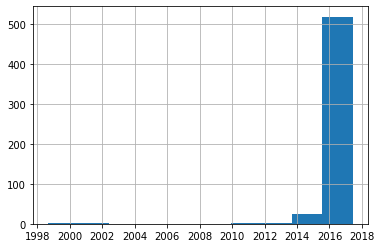

In [ ]:
df.created.hist()

In [ ]:
from collections import defaultdict

In [ ]:
search = arxiv.Search('machine learning', max_results=10000)

In [ ]:
from tqdm import tqdm

In [ ]:
%%time
dict_arxiv = defaultdict(list)
for result in tqdm(search.get()):
  # result.download_pdf()
  dict_arxiv['abstract'].append(result.summary)
  dict_arxiv['published'].append(result.published)
  dict_arxiv['title'].append(result.title)

10000it [07:01, 23.72it/s]

CPU times: user 22.6 s, sys: 439 ms, total: 23.1 s
Wall time: 7min 1s


In [ ]:
df_arx = pd.DataFrame(dict_arxiv)
df_arx['published'] = pd.to_datetime(df_arx.published)

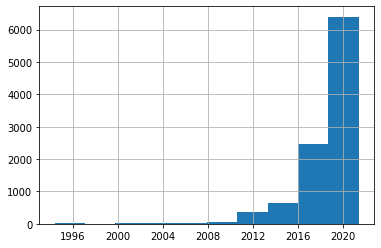

In [ ]:
df_arx.published.hist()

In [ ]:
df_arx.to_csv('arx_10000_machine_learning.csv', index=None)